In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# データセットの作成
データ発生過程（母集団）
$$
y_i = \beta x_i + u_i \\
\beta = 1, ~~ u_i \overset{i.i.d}{\sim} N(0, 0.02), ~~ x_i \overset{iid}{\sim} U(-0.5,0.5)
$$

In [2]:
n = 30               # sample size
sigsq = 0.02         # error variance
sig = np.sqrt(sigsq) # error standard deviation
x = np.random.rand(n) - 0.5 # generate x from Unif(-0.5, 0.5)

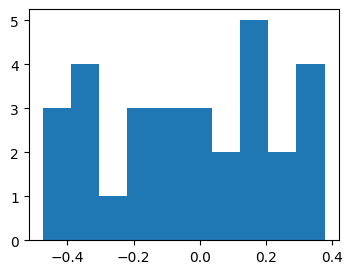

In [3]:
fig, ax = plt.subplots(figsize=(4,3))
ax.hist(x);

In [4]:
beta = 1 # true slope coefficient
# generate error from N(0, sigsq)
u = np.random.normal(loc=0, scale=sig, size=n)
# generate y1
y1 = beta * x + u

In [5]:
beta = -1 # true slope coefficient
# generate error from N(0, sigsq)
u = np.random.normal(loc=0, scale=sig, size=n)
# generate y1
y2 = beta * x + u

# 単純回帰分析
２変数の相関関係を知りたい時は，散布図が有用．

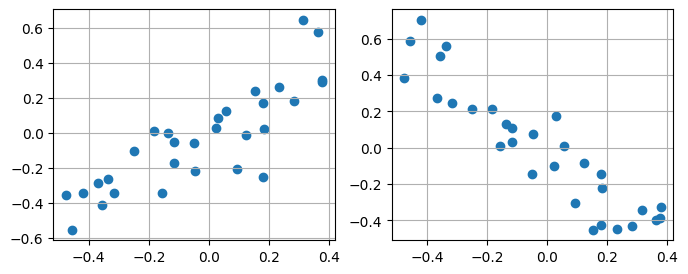

In [6]:
# draw a scatter plot
fig = plt.figure(figsize=(8,3))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(x, y1)
ax2.scatter(x, y2)
ax1.grid()
ax2.grid();

## 定数項なし
散布図から定数項を含まない単純回帰モデルを想定：
$$
y_i = \beta x_i + u_i,~~~~ i = 1,\ldots,n
$$
回帰直線
$$
\hat{y} = \hat{\beta}x
$$
を引く．ここで，最小二乗推定量 $\hat{\beta}$ は
$$
\hat{\beta} = \frac{\sum_i x_iy_i}{\sum_i x_i^2}
$$
で与えられる．

In [7]:
# compute the estimate of beta
def beta_hat(x, y):
    sum_products = sum(x * y)
    sum_squared = sum(x * x)
    return sum_products / sum_squared

# compute the estimate of y
def y_hat(x, beta):
    return beta * x

In [8]:
print(f"beta for data 1: {beta_hat(x, y1)}")
print(f"beta for data 2: {beta_hat(x, y2)}")

beta for data 1: 0.9223406519717641
beta for data 2: -1.1752427431099073


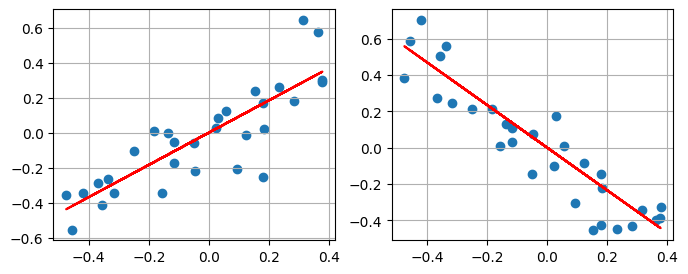

In [9]:
# draw a fitted line
fig = plt.figure(figsize=(8,3))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(x, y1)
ax2.scatter(x, y2)
ax1.plot(x, y_hat(x, beta_hat(x, y1)), c="red")
ax2.plot(x, y_hat(x, beta_hat(x, y2)), c="red")
ax1.grid()
ax2.grid();


## 定数項あり
次に定数項を含む単純回帰モデルを考える．

In [15]:
# load data
df = pd.read_csv("./Data/week2_dataset3.csv")
df.head(3)

,Unnamed: 0,y,x
0,1,1.539043,1.207890
1,2,1.509699,0.783165
2,3,1.395093,0.941877


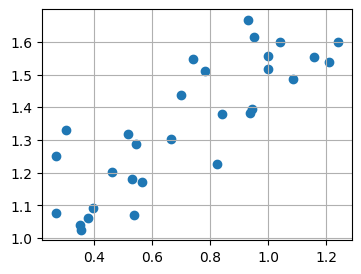

In [17]:
# draw a scatter plot
fig, ax = plt.subplots(figsize=(4,3))
ax.scatter('x', 'y', data=df)
ax.grid()
pass

散布図から定数項を含む単純回帰モデルを考える：
$$
y_i = \alpha + \beta x_i + u_i,~~~~ i = 1,\ldots,n
$$
回帰直線
$$
\hat{y} = \hat{\alpha} + \hat{\beta}x
$$
を引く．ここで，最小二乗推定量 $\hat{\alpha},\hat{\beta}$ は
$$
\hat{\alpha} = \bar{y} - \hat{\beta}\bar{x},~~~~
\hat{\beta} = \frac{\sum_i (x_i-\bar{x})(y_i-\bar{y})}{\sum_i (x_i-\bar{x})^2}
$$
で与えられる．

In [34]:
# compute the estimate of alpha
def alpha_hat(df):
    x, y = df["x"], df["y"]
    x_bar, y_bar = df["x"].mean(), df["y"].mean()
    sum_products = sum((x-x_bar) * (y-y_bar))
    sum_squared = sum((x-x_bar)**2)
    return y_bar - (sum_products / sum_squared) * x_bar

# compute the estimate of beta
def beta_hat(df):
    x, y = df["x"], df["y"]
    x_bar, y_bar = df["x"].mean(), df["y"].mean()
    sum_products = sum((x-x_bar) * (y-y_bar))
    sum_squared = sum((x-x_bar)**2)
    return sum_products / sum_squared

# compute the estimate of y
def y_hat(df):
    x, y = df["x"], df["y"]
    x_bar, y_bar = df["x"].mean(), df["y"].mean()
    sum_products = sum((x-x_bar) * (y-y_bar))
    sum_squared = sum((x-x_bar)**2)
    alpha_hat = y_bar - (sum_products / sum_squared) * x_bar
    beta_hat = sum_products / sum_squared
    return alpha_hat + beta_hat * x

In [35]:
print(f"estimate of alpha: {alpha_hat(df)}")
print(f"estimate of beta: {beta_hat(df)}")

estimate of alpha: 0.9506604376662836
estimate of beta: 0.5537197713776171


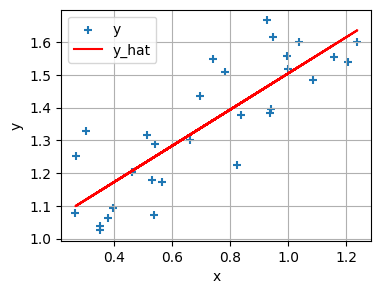

In [38]:
# draw a fitted line
fig, ax = plt.subplots(figsize=(4,3))
ax.scatter('x', 'y', label="y", marker="+", data=df)
ax.plot(df["x"], y_hat(df), label="y_hat",c="r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid()
ax.legend()
pass

### 演習問題
データセット4に対して最小二乗法を実行する．

In [39]:
df4 = pd.read_csv("./Data/week2_dataset4.csv")
df4.head(3)

,Unnamed: 0,y,x
0,1,-0.272791,1.207890
1,2,0.334951,0.783165
2,3,-0.017722,0.941877


In [40]:
print(f"estimate of alpha: {alpha_hat(df4)}")
print(f"estimate of beta: {beta_hat(df4)}")

estimate of alpha: 0.9506604379918114
estimate of beta: -0.946280229169313


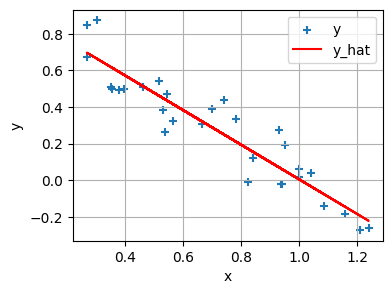

In [41]:
# draw a fitted line
fig, ax = plt.subplots(figsize=(4,3))
ax.scatter('x', 'y', label="y", marker="+", data=df4)
ax.plot(df4["x"], y_hat(df4), label="y_hat",c="r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid()
ax.legend()
pass